<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/TimeSeries/20210530_samydata_changepointdetection_hmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/urban_heat/colabnb/kmlee/

/content/drive/.shortcut-targets-by-id/1kvbRVbtsNfOtjX32jnBD86WXtnpvg0k-/urban_heat/colabnb/kmlee


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Change xaxis
from sir_utils import *

In [ ]:
fpaths = pd.read_csv("/content/drive/MyDrive/urban_heat/colabnb/kmlee/timeseries_samy_data/pg2-all-merged.csv")
fpaths

,timestamp,ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,ac9,ac10,ac11,ac12,ac13,ac14,ac15,ac16,wall,ac5_glass,air_temperature
0,2020-01-24 00:00:07,29.84,30.32,28.41,28.74,27.71,27.82,28.00,28.29,28.34,28.08,28.11,29.60,32.78,28.07,29.60,28.23,28.39,27.28,26.4
1,2020-01-24 00:00:17,29.85,30.28,28.41,28.97,27.72,27.82,27.98,28.26,28.34,28.07,28.07,29.56,32.78,28.02,29.56,28.22,28.38,27.27,26.4
2,2020-01-24 00:00:27,29.80,30.38,28.34,29.18,27.68,27.74,27.92,28.24,28.31,28.04,28.02,29.53,32.81,27.99,29.53,28.18,28.38,27.25,26.4
3,2020-01-24 00:00:37,29.84,30.39,28.40,29.34,27.71,27.78,27.98,28.26,28.35,28.04,28.09,29.61,32.89,28.02,29.61,28.22,28.38,27.27,26.4
4,2020-01-24 00:00:47,29.72,30.24,28.26,29.25,27.58,27.69,27.87,28.16,28.23,27.92,27.93,29.46,32.78,27.91,29.46,28.13,28.27,27.18,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447658,2020-03-15 23:59:11,35.08,32.80,37.77,33.41,32.98,32.09,31.45,31.47,31.51,34.43,33.50,31.42,37.70,31.27,31.42,33.92,32.18,30.49,27.7
447659,2020-03-15 23:59:21,35.18,32.84,37.79,33.43,32.98,32.04,31.50,31.52,31.54,34.45,33.44,31.45,37.75,31.29,31.45,33.91,32.21,30.55,27.7
447660,2020-03-15 23:59:31,35.16,32.83,37.65,33.44,32.96,31.95,31.47,31.52,31.54,34.43,33.37,31.46,37.78,31.28,31.46,33.88,32.20,30.53,27.7
447661,2020-03-15 23:59:41,35.10,32.71,37.64,33.32,32.81,31.77,31.33,31.38,31.40,34.24,33.11,31.35,37.65,31.16,31.35,33.74,32.10,30.42,27.7


In [ ]:
# -- set start and end time
st = "2020-01-24 19:00:00"
en = "2020-01-25 04:00:00"

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub_0124 = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub_0124.index):
  fpaths_sub_0124.timestamp[i] = fpaths_sub_0124.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub_0124["xaxis"] = list(range(fpaths_sub_0124.shape[0]))

# -- pull out times
times = fpaths_sub_0124.timestamp.values
#hour = fpaths_sub.hour.values

fpaths_sub_0124

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,timestamp,ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,ac9,ac10,ac11,ac12,ac13,ac14,ac15,ac16,wall,ac5_glass,air_temperature,xaxis
6812,19:00:01,31.22,31.17,31.30,30.82,30.87,31.13,34.66,34.07,33.43,31.08,31.08,31.54,31.99,31.36,31.54,31.73,32.07,29.88,28.7,0
6813,19:00:11,31.24,31.18,31.29,30.84,30.91,31.15,34.67,34.10,33.43,31.10,31.09,31.54,32.00,31.40,31.54,31.74,32.06,29.89,28.7,1
6814,19:00:21,31.24,31.19,31.28,30.85,30.92,31.18,34.66,34.14,33.48,31.10,31.11,31.51,32.02,31.41,31.51,31.75,32.07,29.88,28.7,2
6815,19:00:31,31.22,31.10,31.29,30.79,30.87,31.13,34.64,34.06,33.40,31.06,31.07,31.49,31.94,31.34,31.49,31.70,32.01,29.83,28.6,3
6816,19:00:41,31.18,31.13,31.27,30.79,30.86,31.09,34.63,34.10,33.44,31.10,31.07,31.52,31.95,31.37,31.52,31.70,31.98,29.82,28.6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,03:59:11,26.56,26.91,26.91,28.02,27.70,27.08,26.93,27.42,27.49,26.84,29.63,27.48,31.89,26.79,27.48,28.84,27.04,25.41,25.0,3222
10035,03:59:21,26.64,26.90,26.97,28.05,27.73,27.06,26.98,27.42,27.50,26.87,29.70,27.49,31.84,26.82,27.49,28.82,27.06,25.46,25.0,3223
10036,03:59:31,26.51,26.80,26.88,27.96,27.65,26.94,26.89,27.34,27.49,26.79,29.56,27.41,31.68,26.74,27.41,28.70,27.00,25.36,25.0,3224
10037,03:59:41,26.58,26.90,26.95,27.98,27.71,26.95,26.97,27.41,27.52,26.84,29.66,27.44,31.69,26.82,27.44,28.73,27.07,25.45,25.0,3225


In [ ]:
fpaths_sub_0124.timestamp

6812     19:00:01
6813     19:00:11
6814     19:00:21
6815     19:00:31
6816     19:00:41
           ...   
10034    03:59:11
10035    03:59:21
10036    03:59:31
10037    03:59:41
10038    03:59:51
Name: timestamp, Length: 3227, dtype: object

In [ ]:
fpaths_sub_0124['ac1'].values

array([31.22, 31.24, 31.24, ..., 26.51, 26.58, 26.53])

In [ ]:
import matplotlib.ticker as ticker

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Average of temperature based pixels (10 by 10)')

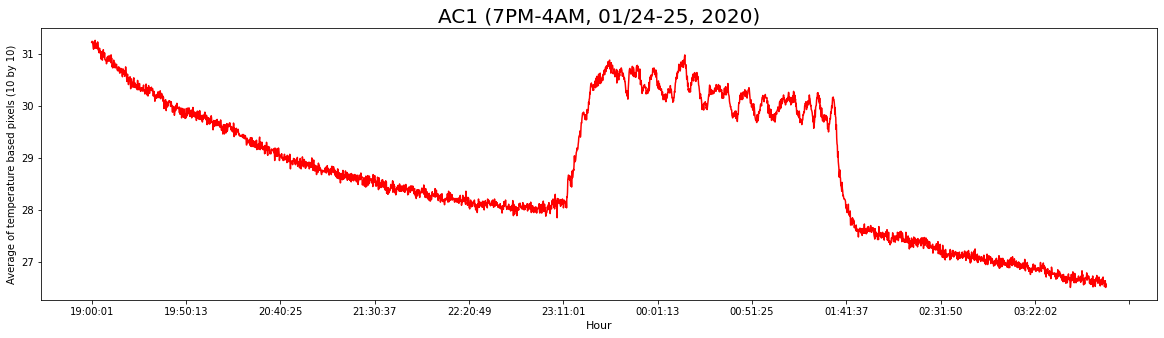

In [ ]:
X = fpaths_sub_0124.timestamp
Y = fpaths_sub_0124['ac1'].values

plt.figure(figsize=(20,5))
plt.plot(X, Y, color="red")
plt.title("AC1 (7PM-4AM, 01/24-25, 2020)", fontsize=20)

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=11)
ax.set_ylabel("Average of temperature based pixels (10 by 10)")

#Change Point Detection

In [ ]:
!pip install ruptures
!pip install changefinder

     |████████████████████████████████| 921kB 7.2MB/s 
     |████████████████████████████████| 163kB 7.7MB/s 
  Created wheel for changefinder: filename=changefinder-0.3-cp37-none-any.whl size=3823 sha256=584b6ab4f74e4505abd888abf90d4019eeba0b07b89a7025517238e67b5ea023
  Stored in directory: /root/.cache/pip/wheels/ab/1c/de/3c0c0e4a6ee252b83ae19b252f3ae4f0a8ba4799c253afbd92
Successfully built changefinder


In [ ]:
import ruptures as rpt
import changefinder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


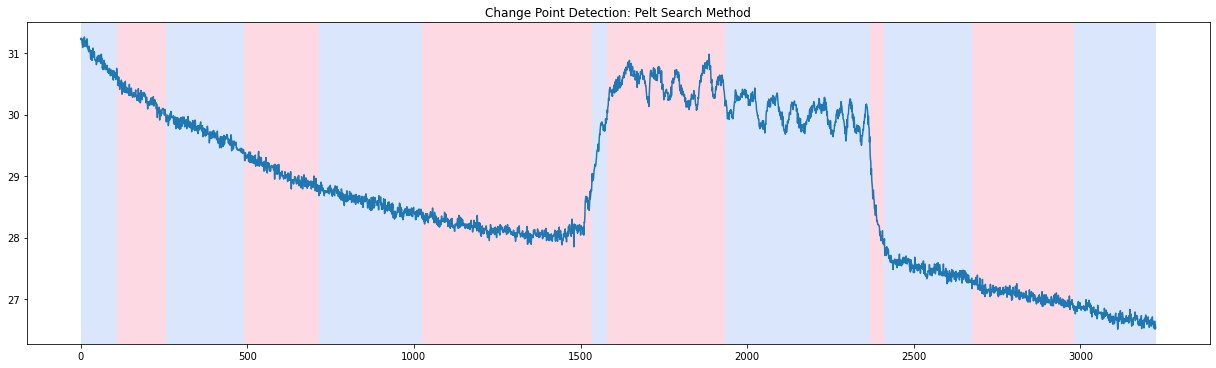

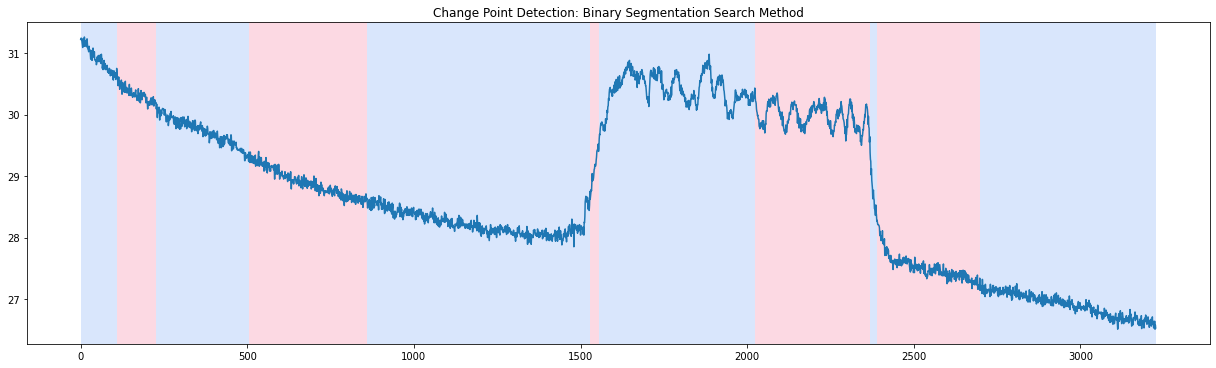

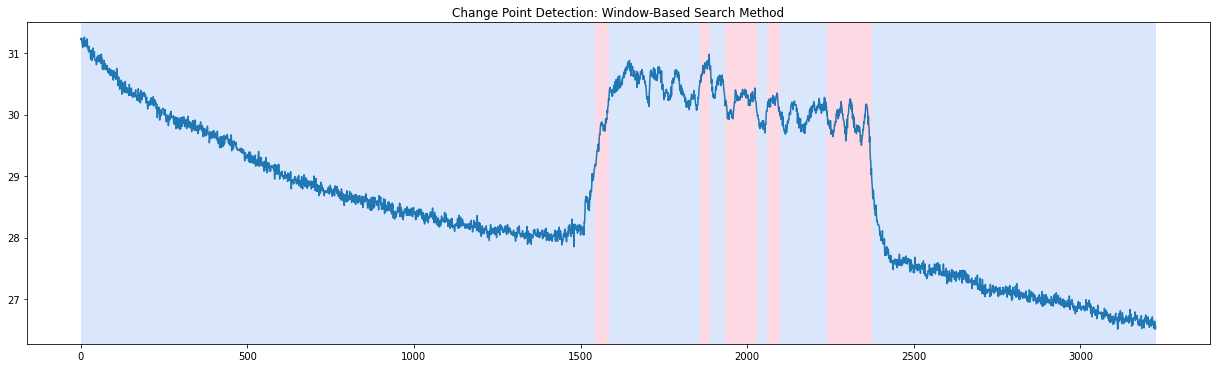

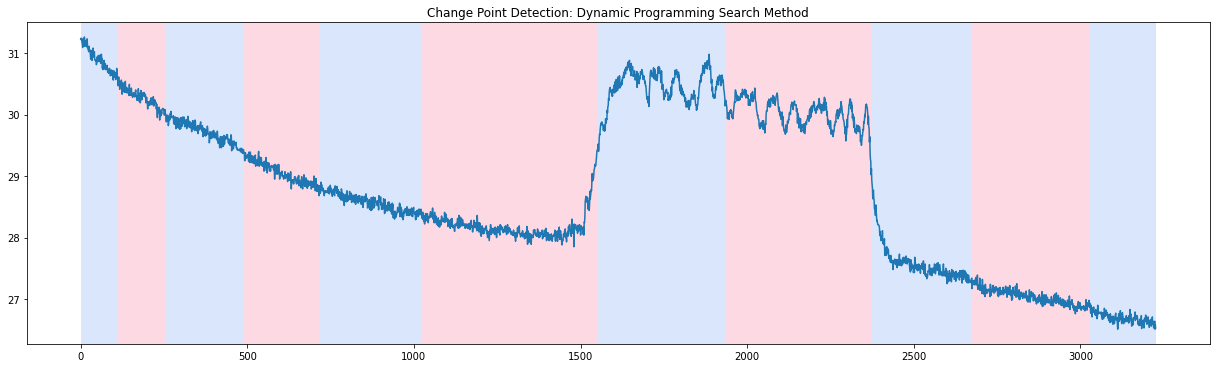

In [ ]:
#Convert the time series values to a numpy 1D array
points = fpaths_sub_0124['ac1'].values

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result_pelt = algo.predict(pen=10)
rpt.show.display(points, result_pelt, figsize=(17, 5))
plt.title('Change Point Detection: Pelt Search Method')

#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
result_bin = algo.predict(n_bkps=10)
rpt.show.display(points, result_bin, figsize=(17, 5))
plt.title('Change Point Detection: Binary Segmentation Search Method')

#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
result_win = algo.predict(n_bkps=10)
rpt.show.display(points, result_win, figsize=(17, 5))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
result_dyn = algo.predict(n_bkps=10)
rpt.show.display(points, result_dyn, figsize=(17, 5))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

Text(0.5, 1.0, 'Anomaly Score: Air conditioner unit (7PM-4AM/01/24-25/2020)')

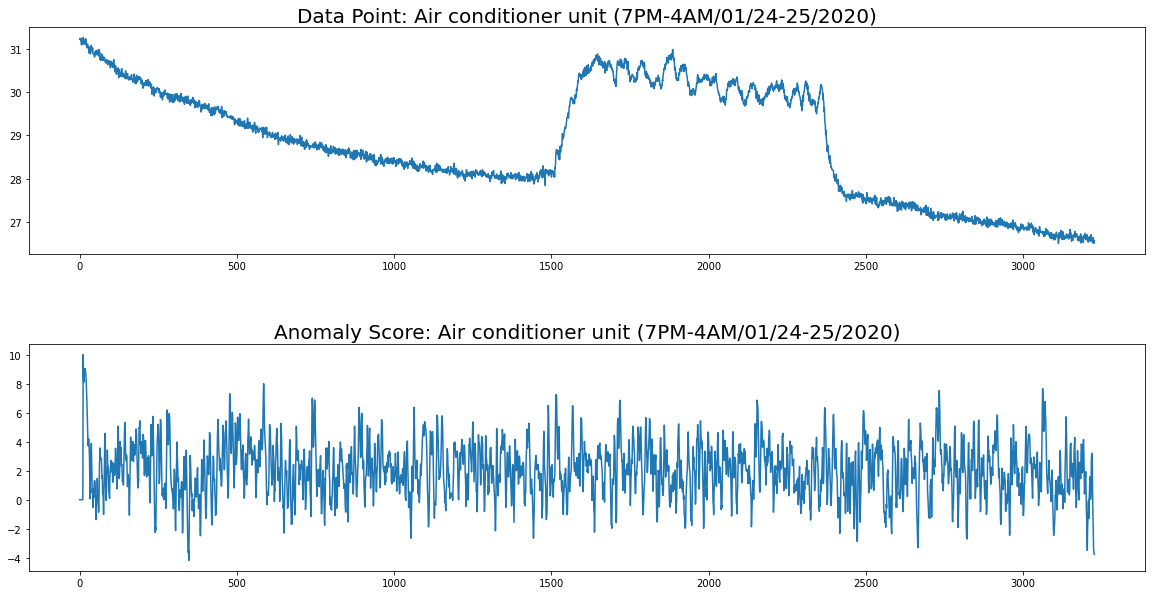

In [ ]:
points = fpaths_sub_0124['ac1'].values

#CHANGEFINDER PACKAGE
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

f.subplots_adjust(hspace=0.4)
ax1.plot(points)
ax1.set_title("Data Point: Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
ax2.plot(scores)
ax2.set_title("Anomaly Score: Air conditioner unit (7PM-4AM/01/24-25/2020)", fontsize=20)

# HMM model

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 378kB 2.9MB/s 


In [ ]:
import numpy as np
from hmmlearn import hmm
import scipy.stats as ss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

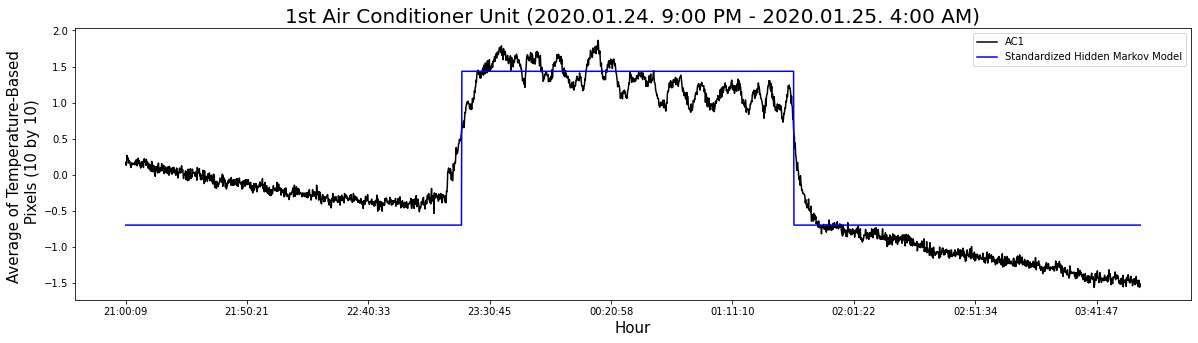

In [ ]:
# -- set start and end time
st = "2020-01-24 21:00:00"
en = "2020-01-25 04:00:00"

# -- get the subset of the file paths dataframe that corresponds to those times
fpaths_sub_0124 = fpaths[(fpaths.timestamp >= st) & (fpaths.timestamp < en)]

for i in list(fpaths_sub_0124.index):
  fpaths_sub_0124.timestamp[i] = fpaths_sub_0124.timestamp[i].split(" ")[1].split(" ")[0]

fpaths_sub_0124["xaxis"] = list(range(fpaths_sub_0124.shape[0]))

# -- pull out times
times = fpaths_sub_0124.timestamp.values
#hour = fpaths_sub.hour.values

#HMM Learn model
x = fpaths_sub_0124['ac1'].values
x = x[~(np.isnan(x))].reshape(-1,1)
h = hmm.GaussianHMM(n_components=2, n_iter=10, verbose=True, covariance_type="full")
h = h.fit(x)
y = h.predict(x).reshape(-1,1)

# Standardization using ZSCORE
ss_x = ss.zscore(x)
ss_y = ss.zscore(y)

plt.figure(figsize = (20,5))
dum = plt.plot(times, ss_x, "black", label = "AC1")
dum = plt.plot(times, ss_y, "blue", label = "Standardized Hidden Markov Model")
plt.title("1st Air Conditioner Unit (2020.01.24. 9:00 PM - 2020.01.25. 4:00 AM)", fontsize=20) # Change here

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Average of Temperature-Based \n Pixels (10 by 10)", fontsize=15)
plt.legend(loc="best")